In [1]:
import matlab.engine
eng = matlab.engine.start_matlab()

In [2]:
from platform import python_version

print(python_version())

3.9.0


In [3]:
y, Fs = 0, 0

In [4]:
PCG_abnormal=[y,Fs]

In [60]:
PCG_abnormal=eng.audioread('C:/MATLAB/physionet.org/files/challenge-2016/1.0.0/training-e/e00008.wav')

In [61]:
PCG_abnormal

matlab.double([[-0.0111083984375],[-0.0135498046875],[-0.01971435546875],[-0.020965576171875],[-0.01971435546875],[-0.01971435546875],[-0.01849365234375],[-0.01849365234375],[-0.014801025390625],[-0.00738525390625],[0.00738525390625],[0.01849365234375],[0.02587890625],[0.0357666015625],[0.040679931640625],[0.039459228515625],[0.038238525390625],[0.02587890625],[0.0111083984375],[-0.00494384765625],[-0.016021728515625],[-0.032073974609375],[-0.038238525390625],[-0.040679931640625],[-0.04315185546875],[-0.040679931640625],[-0.034515380859375],[-0.02960205078125],[-0.024658203125],[-0.02587890625],[-0.032073974609375],[-0.040679931640625],[-0.04931640625],[-0.062896728515625],[-0.075225830078125],[-0.082611083984375],[-0.0838623046875],[-0.081390380859375],[-0.07275390625],[-0.0616455078125],[-0.053009033203125],[-0.039459228515625],[-0.02587890625],[-0.0135498046875],[-0.001220703125],[0.00738525390625],[0.014801025390625],[0.022186279296875],[0.028350830078125],[0.028350830078125],[0.03

In [62]:
eng.plot(PCG_abnormal[1:6000],'r')

In [58]:
cp=eng.findchangepts(PCG_abnormal[1:6000], 'Statistic','std', 'MinDistance',2E+1, 'MaxNumChanges',13)

In [59]:
cp

matlab.double([[319.0],[654.0],[932.0],[1077.0],[1781.0],[2105.0],[2385.0],[2522.0],[3251.0],[4007.0],[4727.0],[4877.0],[5538.0]])

In [10]:
S1=PCG_abnormal[319:654
Systole=PCG_abnormal[754:1509]
S2=PCG_abnormal[1509:1801]
Diastole=PCG_abnormal[1801:2181]

In [11]:
print(len(S1))
print(len(S2))
print(len(Systole))
print(len(Diastole))

333
292
755
380


In [12]:
import numpy as np
from scipy.io.wavfile import write
abc=np.array(S1)

In [13]:
new_S1=[]
for i in range(len(S1)):
    new_S1.append(S1[i][0])
    
new_S1=np.array(new_S1)
len(new_S1)

333

In [14]:
write('newtest.wav', 2000, new_S1)

In [15]:
import librosa
import pylab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import librosa.display

C:\Users\Roshni\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [16]:
def getSpectrogram(waveform_path,title):
    data, samplerate = librosa.load(waveform_path)
    time_sec = (len(data)/samplerate)
    step = time_sec/len(data)
    i = 0
    time_divion = []
    while i <= time_sec-step:
        time_divion.append(i)
        i = i+step
    four_sec_step_number = (4*len(time_divion))/time_sec
    fig, ax = plt.subplots()
    plt.axis('off')
    #plt.title(title)
    #fig.set_figwidth(2)
    #fig.set_figheight(1)
    mel_feat = librosa.feature.melspectrogram(y=data, sr=44000)
    power = librosa.power_to_db(mel_feat, ref=np.max)
    librosa.display.specshow(power)

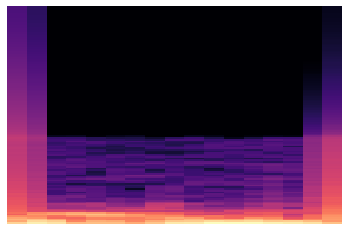

In [17]:
new_Systole=[]
for i in range(len(Systole)):
    new_Systole.append(Systole[i][0])
    
new_Systole=np.array(new_Systole)
write('newSystole.wav',2000,new_Systole)

getSpectrogram('newSystole.wav', "Systole")

In [18]:
PCG_abnormal=eng.audioread('C:/MATLAB/physionet.org/files/challenge-2016/1.0.0/training-c/c0001.wav')
cp=eng.findchangepts(PCG_abnormal[1:6000], 'Statistic','std', 'MinDistance',2E+1, 'MaxNumChanges',13)


In [19]:
S1=PCG_abnormal[round(cp[0][0]):round(cp[1][0])]
Systole=PCG_abnormal[round(cp[1][0]):round(cp[2][0])]
S2=PCG_abnormal[round(cp[2][0]):round(cp[3][0])]
Diastole=PCG_abnormal[round(cp[3][0]):round(cp[4][0])]

In [20]:
from pathlib import Path
import re


In [40]:
normalList=['d0002',
'd0003',
'd0004',
'd0008',
'd0009',
'd0010',
'd0011',
'd0012',
'd0014',
'd0017',
'd0018',
'd0019',
'd0021',
'd0022',
'd0026',
'd0028',
'd0029',
'd0032',
'd0033',
'd0034',
'd0035',
'd0038',
'd0039',
'd0040',
'd0042',
'd0046',
'd0051',
'd0052']



In [41]:
def segment_Files(wavpath,patientid):
    PCG_signal=eng.audioread(wavpath)
    cp=eng.findchangepts(PCG_signal[1:6000], 'Statistic','std', 'MinDistance',2E+1, 'MaxNumChanges',13)
    S1=PCG_signal[round(cp[0][0]):round(cp[1][0])]
    Systole=PCG_signal[round(cp[1][0]):round(cp[2][0])]
    S2=PCG_signal[round(cp[2][0]):round(cp[3][0])]
    Diastole=PCG_signal[round(cp[3][0]):round(cp[4][0])]
    get_all_spectrograms(S1,S2,Systole,Diastole,patientid)
    
def get_all_spectrograms(S1,S2,Systole,Diastole,patientid):
    new_S1=[]
    for i in range(len(S1)):
        new_S1.append(S1[i][0])
    new_S1=np.array(new_S1)
    write('newS1.wav',2000,new_S1)
    getSpectrogram('newS1.wav','S1')
    plt.savefig(f'C:/Users/Roshni/OneDrive/Desktop/Sem7/Project 1/NovemberWork/NormalS1/{patientid}.png')
    print(f'SAVED S1 {patientid}')
    
    new_Systole=[]
    for i in range(len(Systole)):
        new_Systole.append(Systole[i][0]) 
    new_Systole=np.array(new_Systole)
    write('newSystole.wav',2000,new_Systole)
    getSpectrogram('newSystole.wav','Systole')
    plt.savefig(f'C:/Users/Roshni/OneDrive/Desktop/Sem7/Project 1/NovemberWork/NormalSystole/{patientid}.png')
    print(f'SAVED Systole {patientid}')
    
    newS2=[]
    for i in range(len(S2)):
        newS2.append(S2[i][0])
    newS2=np.array(newS2)
    write('newS2.wav',2000,newS2)
    getSpectrogram('newS2.wav','S2')
    plt.savefig(f'C:/Users/Roshni/OneDrive/Desktop/Sem7/Project 1/NovemberWork/NormalS2/{patientid}.png')
    print(f'SAVED S2 {patientid}')
    
    new_Diastole=[]
    for i in range(len(Diastole)):
        new_Diastole.append(Diastole[i][0])
    new_Diastole=np.array(new_Diastole)
    write('newDiastole.wav',2000,new_Diastole)
    getSpectrogram('newDiastole.wav','Diastole')
    plt.savefig(f'C:/Users/Roshni/OneDrive/Desktop/Sem7/Project 1/NovemberWork/NormalDiastole/{patientid}.png')
    print(f'SAVED Diastole {patientid}')
    
    


C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0001.wav
d0001
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0002.wav
d0002


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1610
  return f(*args, **kwargs)


SAVED S1 d0002
SAVED Systole d0002
SAVED S2 d0002
SAVED Diastole d0002
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0003.wav
d0003


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1665
  return f(*args, **kwargs)
C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=221
  return f(*args, **kwargs)


SAVED S1 d0003
SAVED Systole d0003
SAVED S2 d0003
SAVED Diastole d0003
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0004.wav
d0004
SAVED S1 d0004
SAVED Systole d0004


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1720
  return f(*args, **kwargs)
C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=993
  return f(*args, **kwargs)


SAVED S2 d0004
SAVED Diastole d0004
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0005.wav
d0005
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0006.wav
d0006
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0007.wav
d0007
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0008.wav
d0008
SAVED S1 d0008
SAVED Systole d0008
SAVED S2 d0008
SAVED Diastole d0008
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0009.wav
d0009


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1048
  return f(*args, **kwargs)
C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1379
  return f(*args, **kwargs)


SAVED S1 d0009
SAVED Systole d0009
SAVED S2 d0009
SAVED Diastole d0009
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0010.wav
d0010


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1015
  return f(*args, **kwargs)
C:\Users\Roshni\AppData\Local\Temp\ipykernel_21216\3538619004.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


SAVED S1 d0010
SAVED Systole d0010
SAVED S2 d0010
SAVED Diastole d0010
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0011.wav
d0011
SAVED S1 d0011
SAVED Systole d0011
SAVED S2 d0011
SAVED Diastole d0011
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0012.wav
d0012
SAVED S1 d0012
SAVED Systole d0012
SAVED S2 d0012
SAVED Diastole d0012
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0013.wav
d0013
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0014.wav
d0014


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1985
  return f(*args, **kwargs)


SAVED S1 d0014
SAVED Systole d0014
SAVED S2 d0014
SAVED Diastole d0014
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0015.wav
d0015
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0016.wav
d0016
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0017.wav
d0017


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1544
  return f(*args, **kwargs)


SAVED S1 d0017
SAVED Systole d0017


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=684
  return f(*args, **kwargs)


SAVED S2 d0017
SAVED Diastole d0017
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0018.wav
d0018
SAVED S1 d0018
SAVED Systole d0018
SAVED S2 d0018
SAVED Diastole d0018
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0019.wav
d0019
SAVED S1 d0019
SAVED Systole d0019
SAVED S2 d0019
SAVED Diastole d0019
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0020.wav
d0020
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0021.wav
d0021


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=816
  return f(*args, **kwargs)


SAVED S1 d0021
SAVED Systole d0021
SAVED S2 d0021
SAVED Diastole d0021
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0022.wav
d0022
SAVED S1 d0022
SAVED Systole d0022
SAVED S2 d0022
SAVED Diastole d0022
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0023.wav
d0023
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0024.wav
d0024
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0025.wav
d0025
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0026.wav
d0026
SAVED S1 d0026
SAVED Systole d0026
SAVED S2 d0026
SAVED Diastole d0026
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0027.wav
d0027
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0028.wav
d0028
SAVED S1 d0028
SAVED Systole d0028


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1158
  return f(*args, **kwargs)


SAVED S2 d0028
SAVED Diastole d0028
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0029.wav
d0029
SAVED S1 d0029
SAVED Systole d0029
SAVED S2 d0029
SAVED Diastole d0029
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0030.wav
d0030
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0031.wav
d0031
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0032.wav
d0032
SAVED S1 d0032
SAVED Systole d0032
SAVED S2 d0032
SAVED Diastole d0032
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0033.wav
d0033
SAVED S1 d0033
SAVED Systole d0033
SAVED S2 d0033


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=971
  return f(*args, **kwargs)


SAVED Diastole d0033
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0034.wav
d0034
SAVED S1 d0034
SAVED Systole d0034
SAVED S2 d0034
SAVED Diastole d0034
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0035.wav
d0035
SAVED S1 d0035
SAVED Systole d0035
SAVED S2 d0035
SAVED Diastole d0035
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0036.wav
d0036
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0037.wav
d0037
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0038.wav
d0038
SAVED S1 d0038
SAVED Systole d0038
SAVED S2 d0038
SAVED Diastole d0038
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0039.wav
d0039
SAVED S1 d0039
SAVED Systole d0039
SAVED S2 d0039
SAVED Diastole d0039
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0040.wav
d0040
SAVED S1 d0040
SAVED Systole d0040
SAVED S2 d0040
SAVED Diastole d0040
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0041.wav
d0041


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=706
  return f(*args, **kwargs)


SAVED S1 d0042
SAVED Systole d0042
SAVED S2 d0042
SAVED Diastole d0042
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0043.wav
d0043
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0044.wav
d0044
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0045.wav
d0045
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0046.wav
d0046
SAVED S1 d0046
SAVED Systole d0046
SAVED S2 d0046
SAVED Diastole d0046
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0047.wav
d0047
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0048.wav
d0048
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0049.wav
d0049
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0050.wav
d0050
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0051.wav
d0051
SAVED S1 d0051
SAVED Systole d0051
SAVED S2 d0051
SAVED Diastole d0051
C:\MATLAB\physionet.org\files\challenge-2016\1.0.0\training-d\d0052.wav
d0052
SAVED S

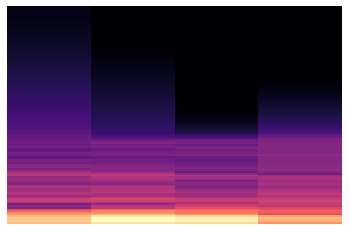

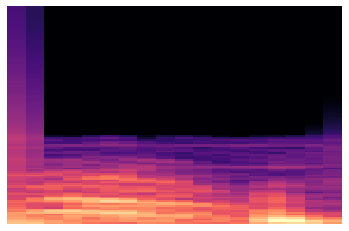

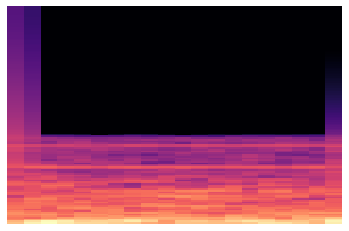

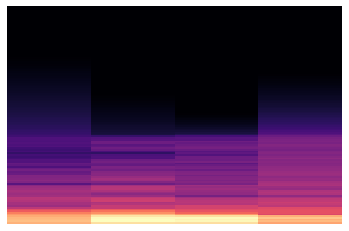

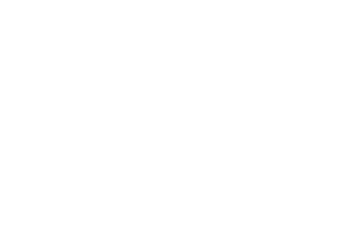

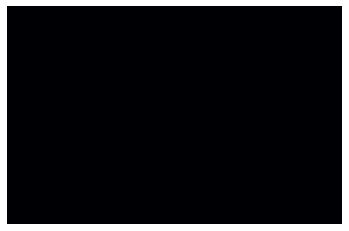

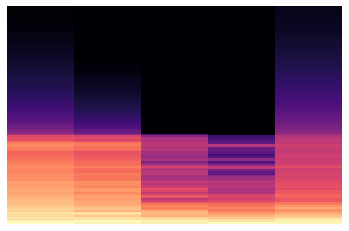

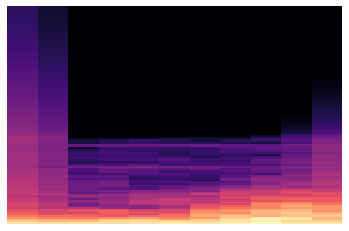

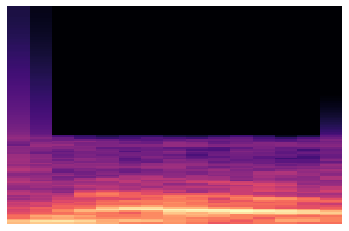

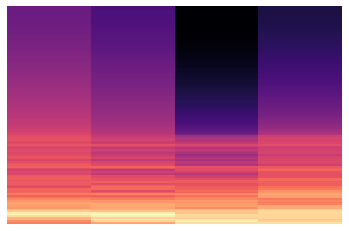

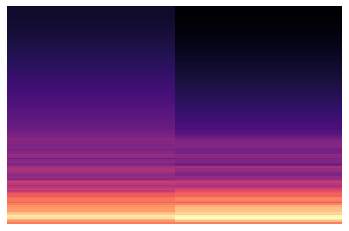

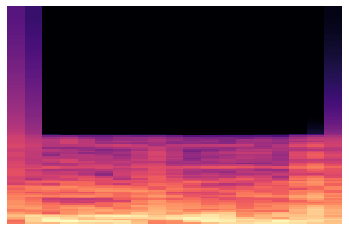

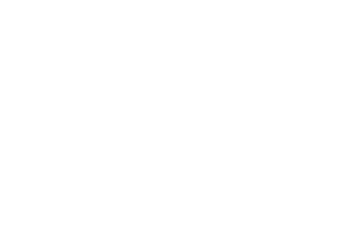

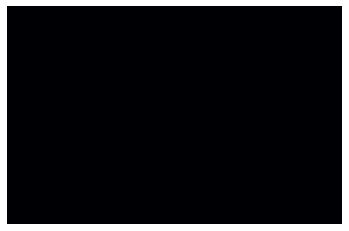

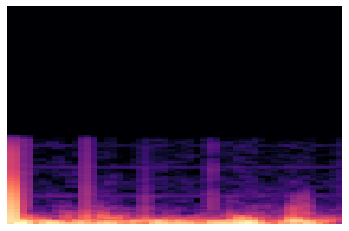

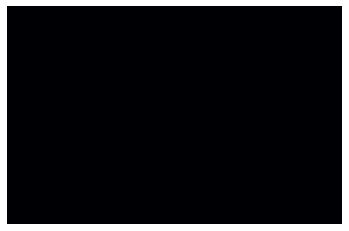

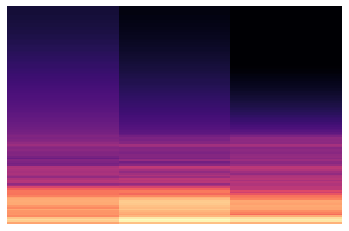

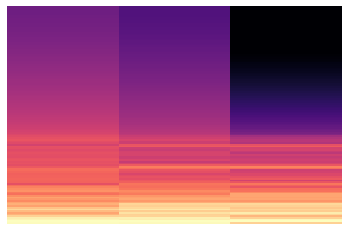

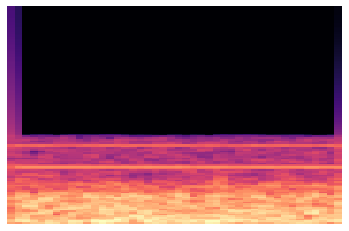

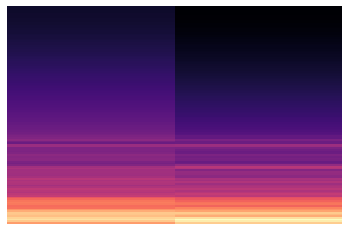

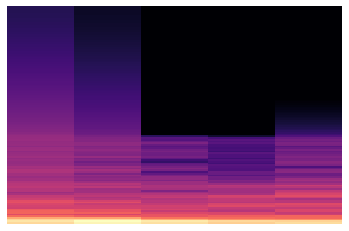

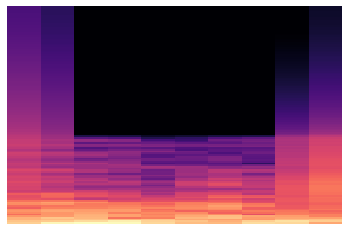

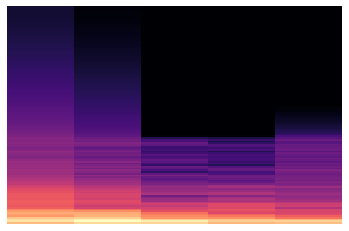

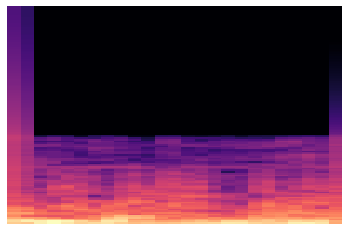

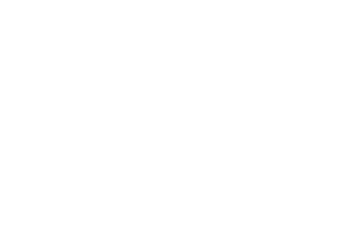

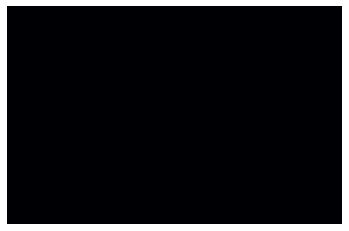

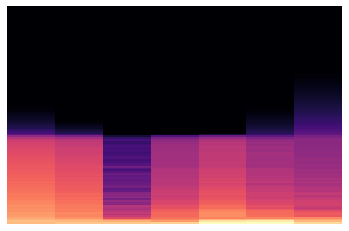

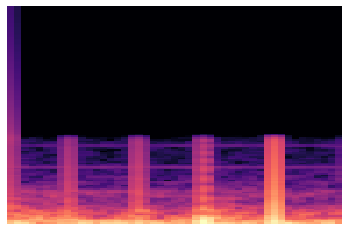

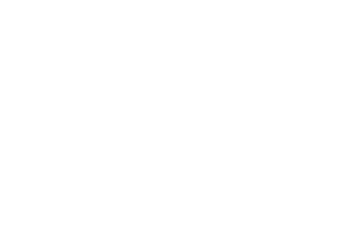

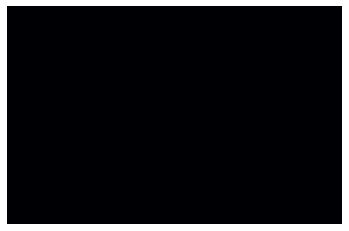

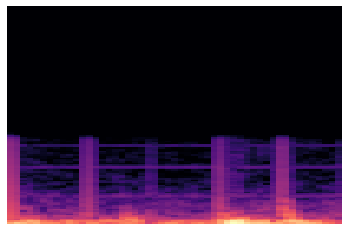

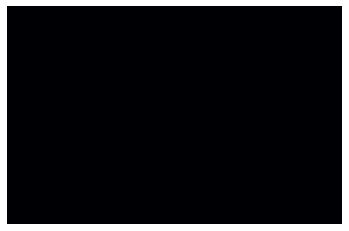

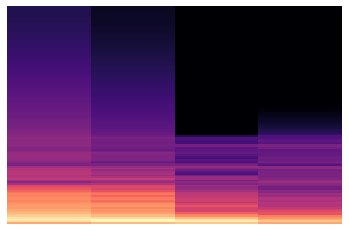

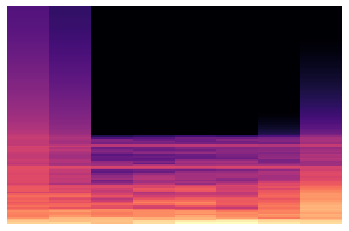

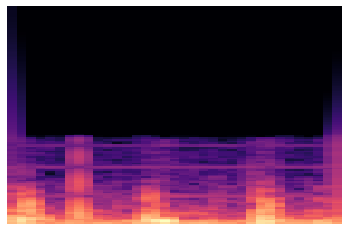

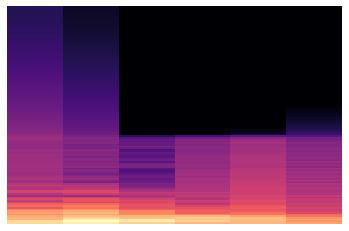

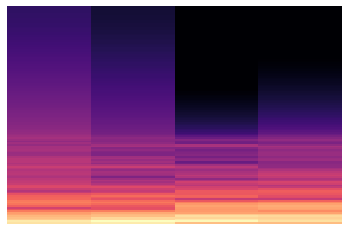

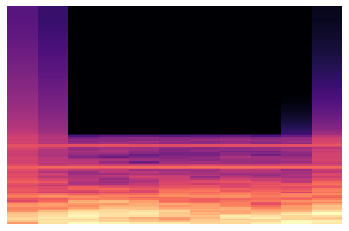

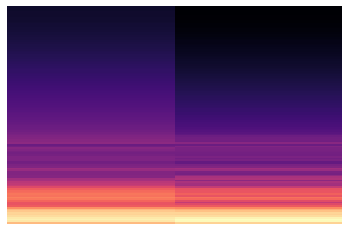

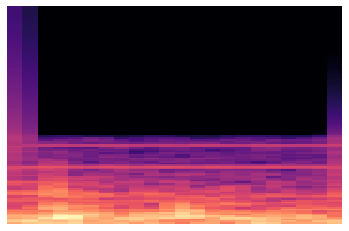

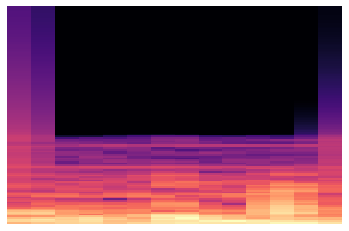

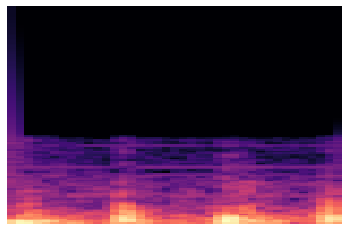

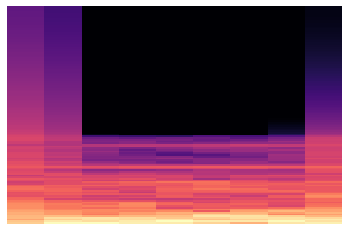

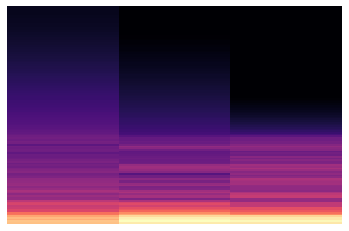

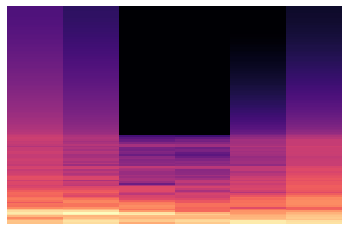

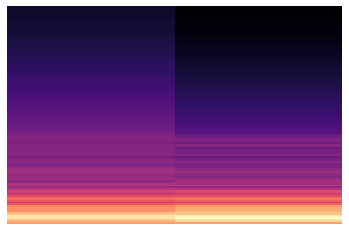

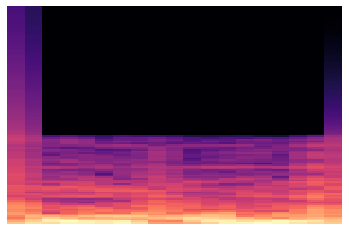

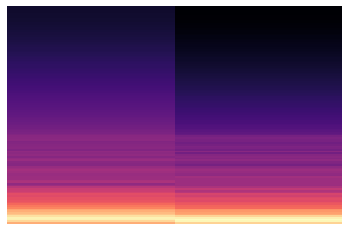

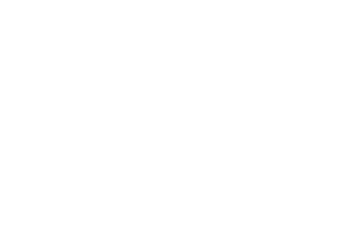

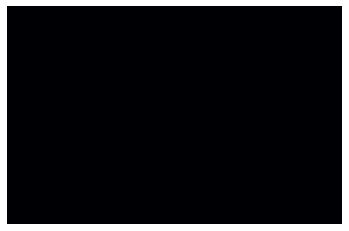

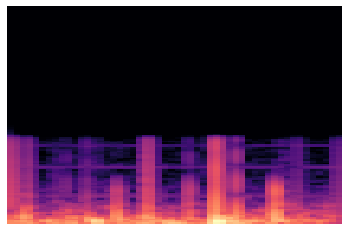

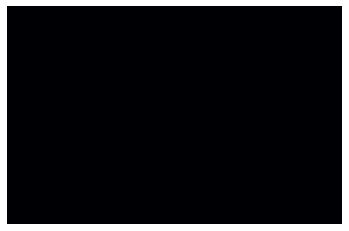

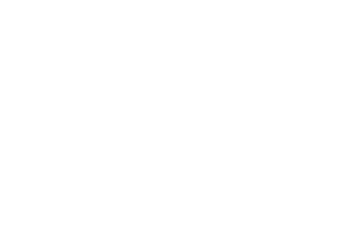

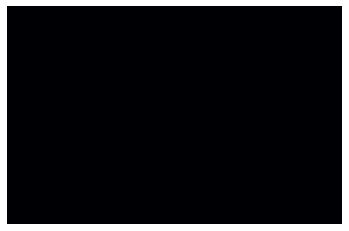

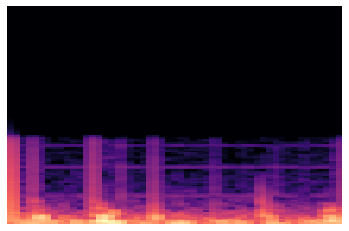

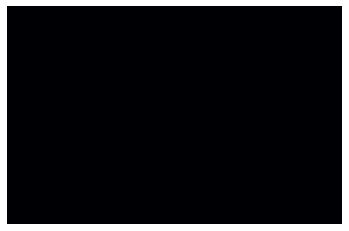

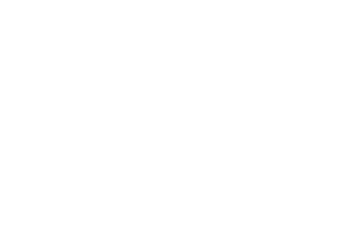

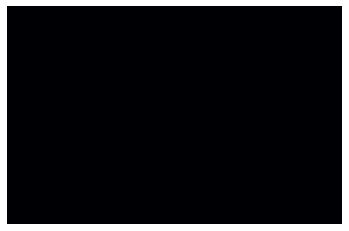

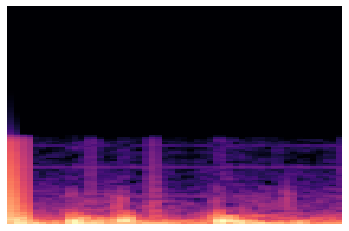

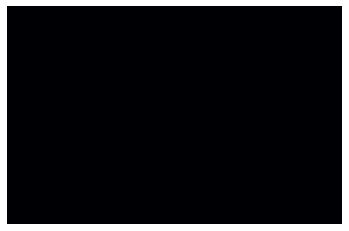

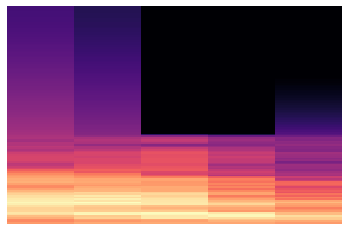

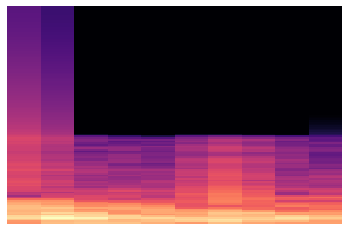

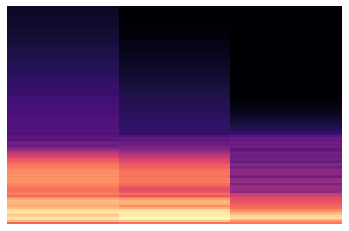

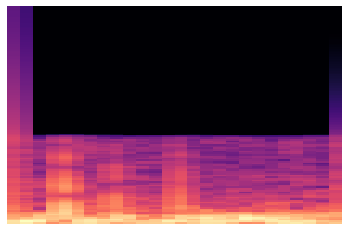

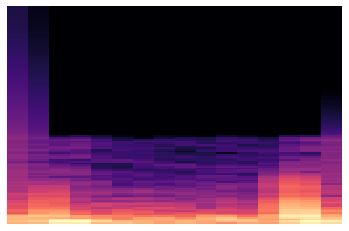

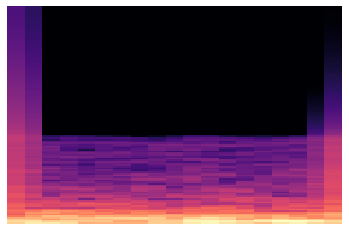

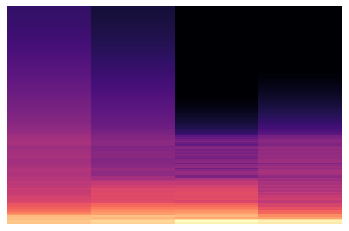

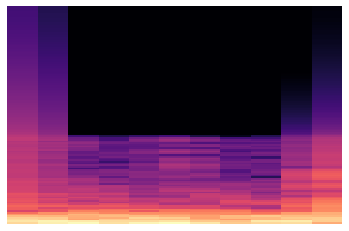

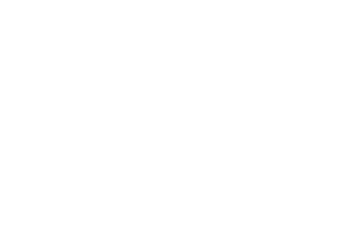

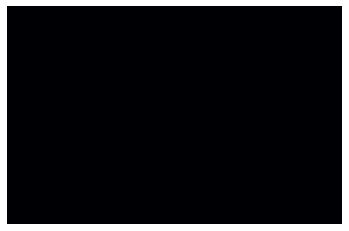

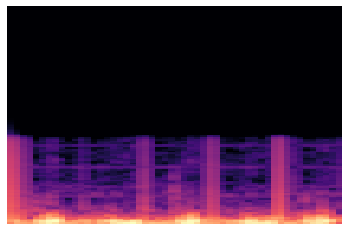

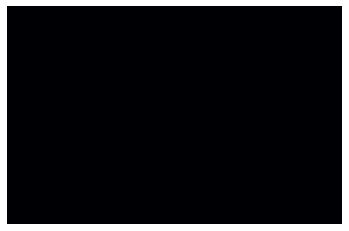

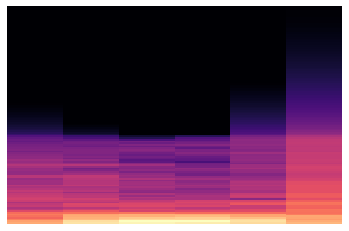

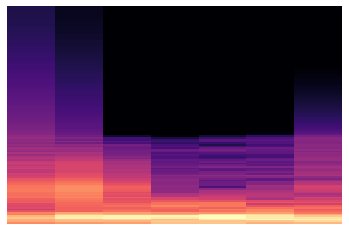

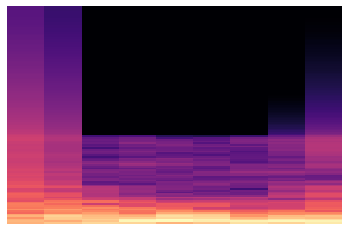

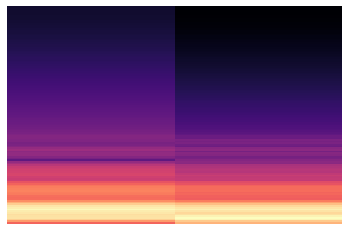

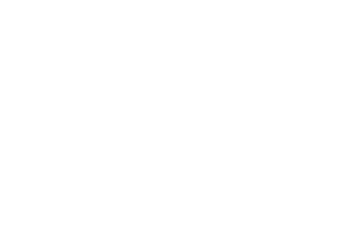

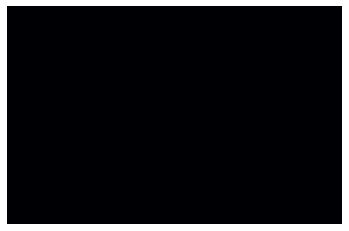

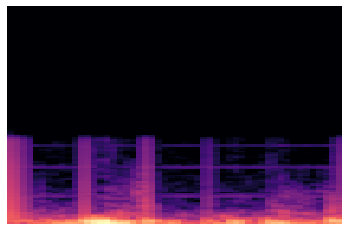

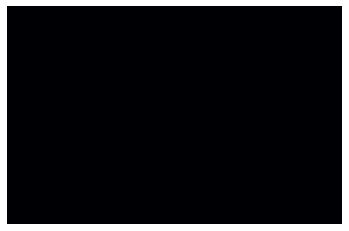

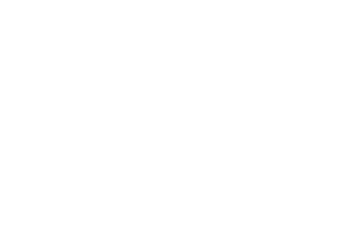

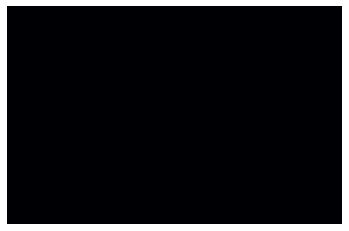

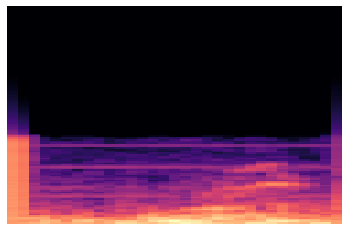

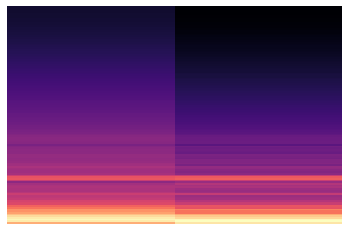

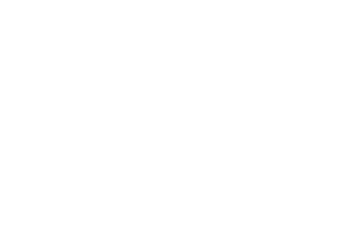

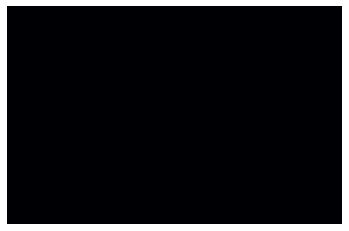

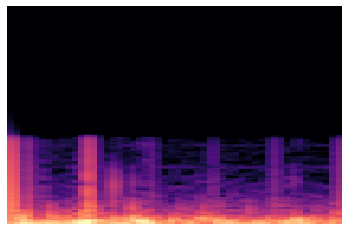

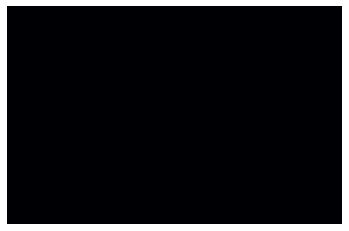

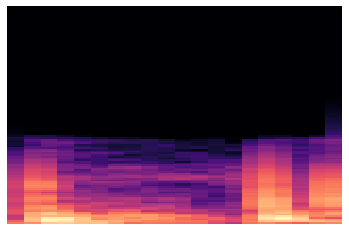

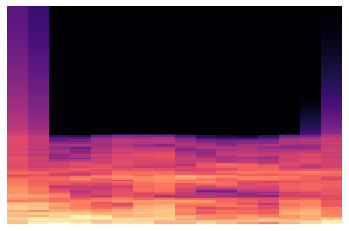

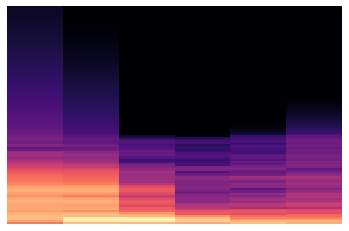

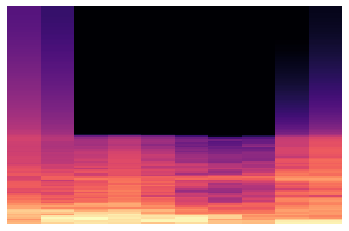

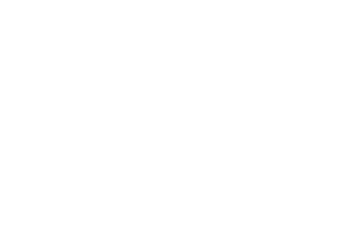

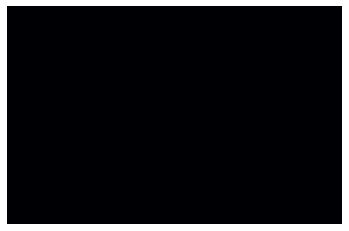

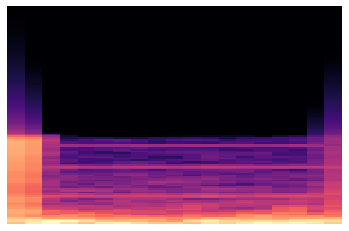

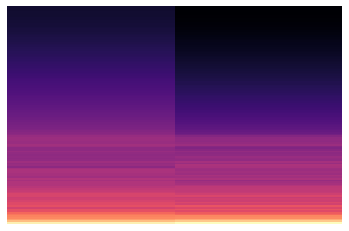

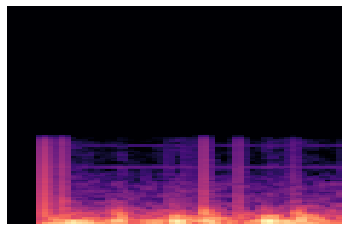

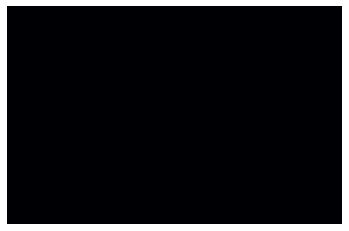

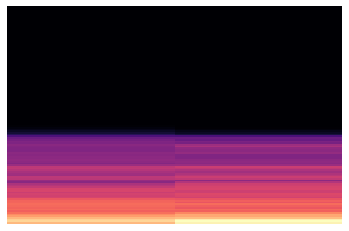

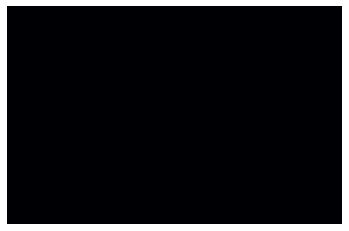

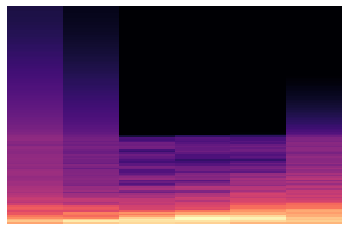

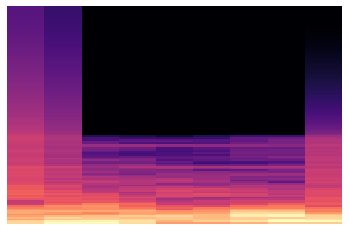

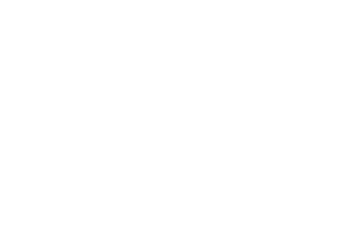

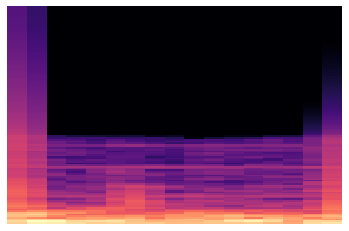

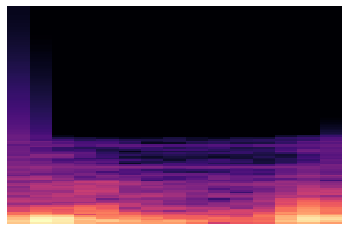

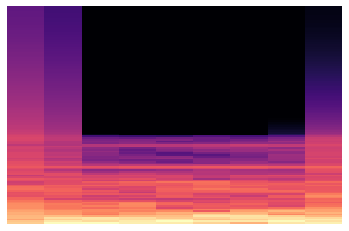

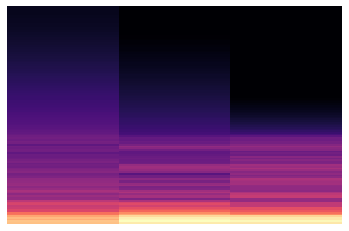

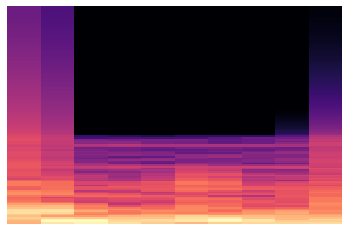

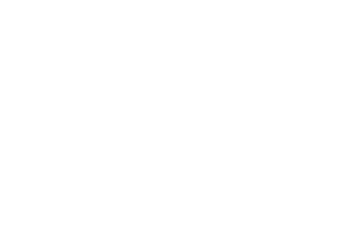

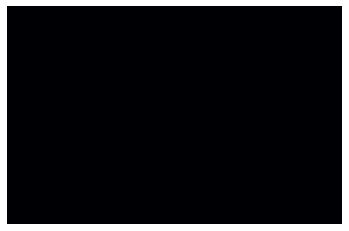

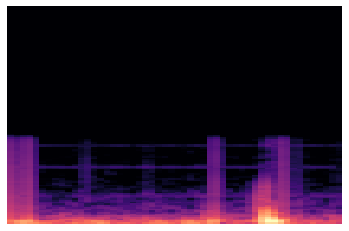

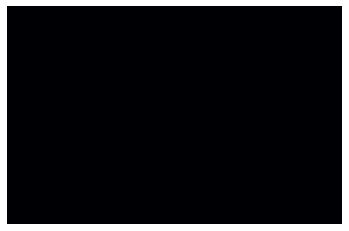

In [43]:

pathlist = Path('C:/MATLAB/physionet.org/files/challenge-2016/1.0.0/training-d/').rglob('*.wav')
for path in pathlist:
    print(path)
    file_name = str(path)

    patientid = file_name.split("\\")[7].split(".")[0]
    
    print(patientid)
    if patientid in normalList:
         segment_Files(file_name,patientid)

SAVED S1 d0001
SAVED Systole d0001
SAVED S2 d0001
SAVED Diastole d0001
SAVED S1 d0005
SAVED Systole d0005


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1467
  return f(*args, **kwargs)


SAVED S2 d0005
SAVED Diastole d0005
SAVED S1 d0006
SAVED Systole d0006
SAVED S2 d0006
SAVED Diastole d0006
SAVED S1 d0007
SAVED Systole d0007
SAVED S2 d0007
SAVED Diastole d0007


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1654
  return f(*args, **kwargs)


SAVED S1 d0013
SAVED Systole d0013
SAVED S2 d0013
SAVED Diastole d0013


C:\Users\Roshni\AppData\Local\Temp\ipykernel_21216\3538619004.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


SAVED S1 d0015
SAVED Systole d0015
SAVED S2 d0015
SAVED Diastole d0015
SAVED S1 d0016
SAVED Systole d0016


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1456
  return f(*args, **kwargs)


SAVED S2 d0016
SAVED Diastole d0016


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=882
  return f(*args, **kwargs)


SAVED S1 d0020
SAVED Systole d0020
SAVED S2 d0020
SAVED Diastole d0020
SAVED S1 d0023
SAVED Systole d0023
SAVED S2 d0023
SAVED Diastole d0023


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1368
  return f(*args, **kwargs)
C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1643
  return f(*args, **kwargs)


SAVED S1 d0024
SAVED Systole d0024
SAVED S2 d0024


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1511
  return f(*args, **kwargs)
C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=838
  return f(*args, **kwargs)


SAVED Diastole d0024
SAVED S1 d0025
SAVED Systole d0025
SAVED S2 d0025
SAVED Diastole d0025
SAVED S1 d0027
SAVED Systole d0027


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=309
  return f(*args, **kwargs)


SAVED S2 d0027
SAVED Diastole d0027
SAVED S1 d0030
SAVED Systole d0030


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1864
  return f(*args, **kwargs)


SAVED S2 d0030
SAVED Diastole d0030
SAVED S1 d0031
SAVED Systole d0031
SAVED S2 d0031
SAVED Diastole d0031
SAVED S1 d0036
SAVED Systole d0036
SAVED S2 d0036
SAVED Diastole d0036


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1831
  return f(*args, **kwargs)


SAVED S1 d0037
SAVED Systole d0037


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1125
  return f(*args, **kwargs)


SAVED S2 d0037
SAVED Diastole d0037
SAVED S1 d0041
SAVED Systole d0041
SAVED S2 d0041
SAVED Diastole d0041
SAVED S1 d0043
SAVED Systole d0043
SAVED S2 d0043
SAVED Diastole d0043


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=805
  return f(*args, **kwargs)


SAVED S1 d0044
SAVED Systole d0044
SAVED S2 d0044
SAVED Diastole d0044
SAVED S1 d0045
SAVED Systole d0045


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=2007
  return f(*args, **kwargs)


SAVED S2 d0045
SAVED Diastole d0045
SAVED S1 d0047
SAVED Systole d0047


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=397
  return f(*args, **kwargs)


SAVED S2 d0047
SAVED Diastole d0047
SAVED S1 d0048
SAVED Systole d0048
SAVED S2 d0048
SAVED Diastole d0048
SAVED S1 d0049
SAVED Systole d0049
SAVED S2 d0049
SAVED Diastole d0049


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=982
  return f(*args, **kwargs)


SAVED S1 d0050
SAVED Systole d0050


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=783
  return f(*args, **kwargs)
C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1037
  return f(*args, **kwargs)


SAVED S2 d0050
SAVED Diastole d0050
SAVED S1 d0053
SAVED Systole d0053
SAVED S2 d0053
SAVED Diastole d0053
SAVED S1 d0054
SAVED Systole d0054


C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1489
  return f(*args, **kwargs)
C:\Users\Roshni\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1202
  return f(*args, **kwargs)


SAVED S2 d0054
SAVED Diastole d0054
SAVED S1 d0055
SAVED Systole d0055
SAVED S2 d0055
SAVED Diastole d0055


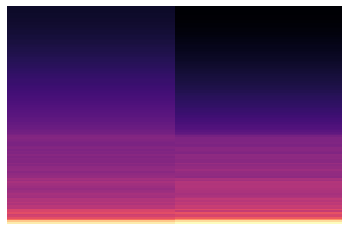

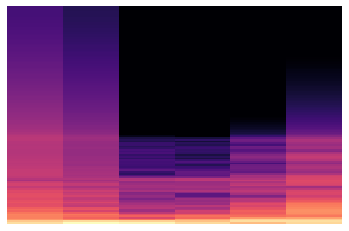

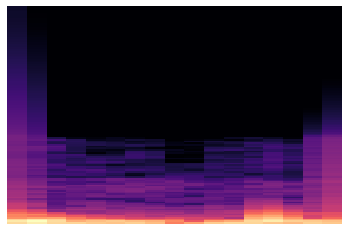

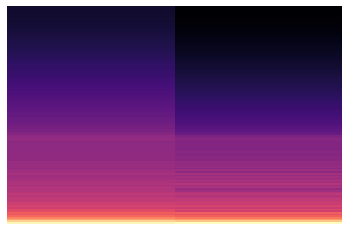

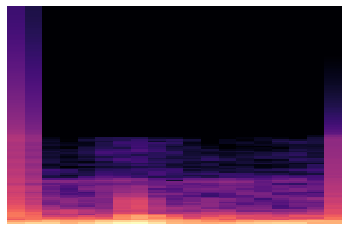

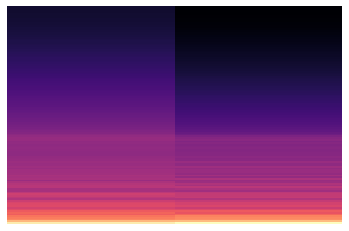

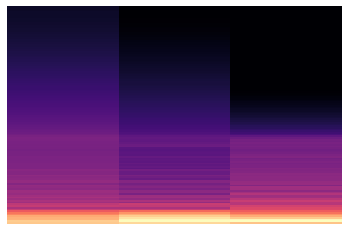

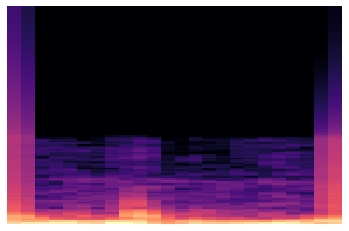

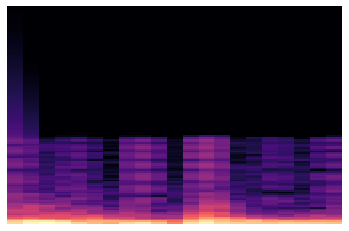

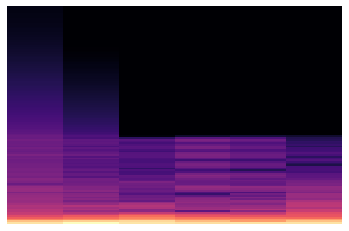

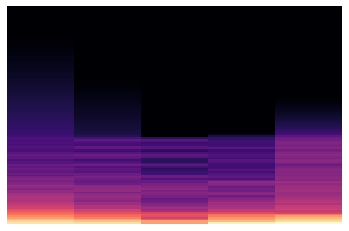

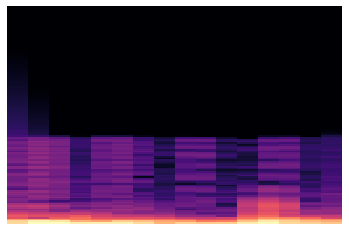

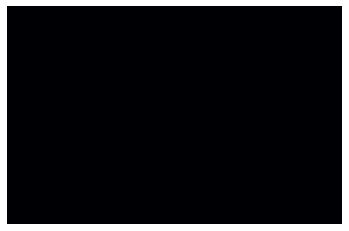

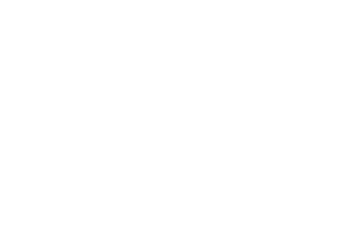

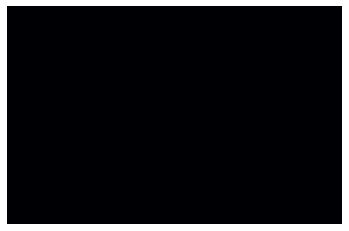

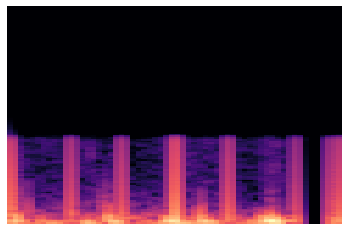

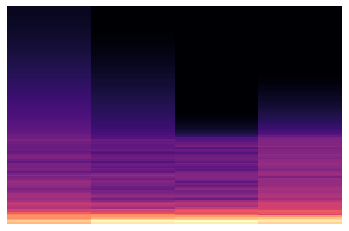

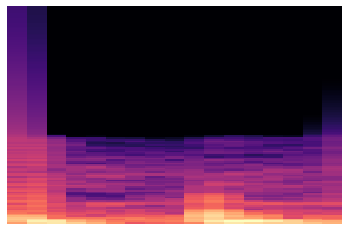

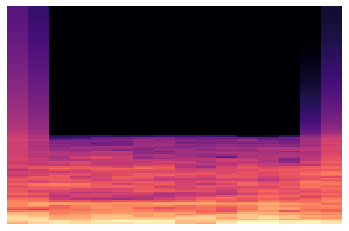

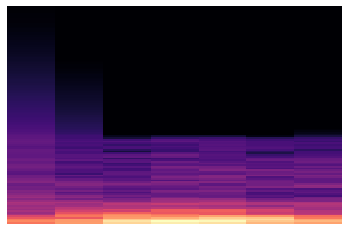

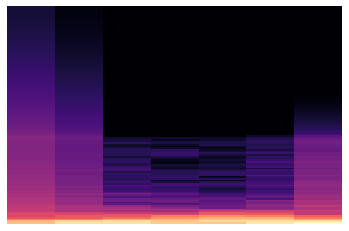

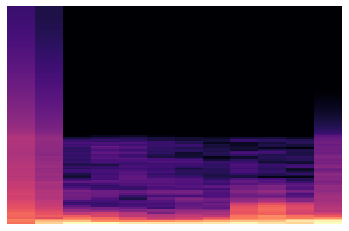

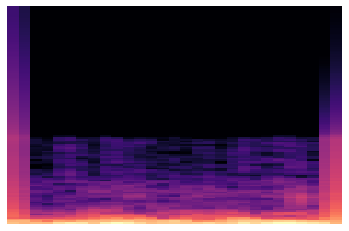

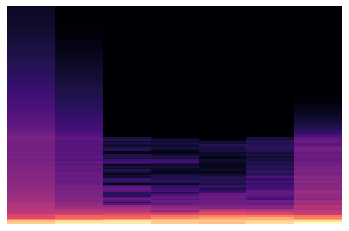

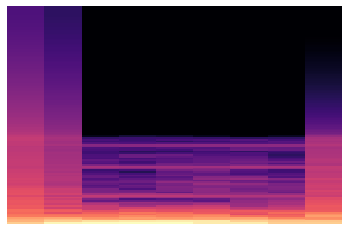

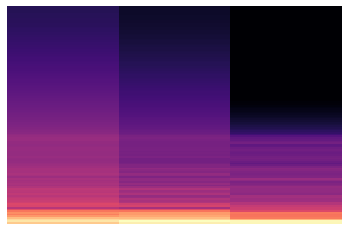

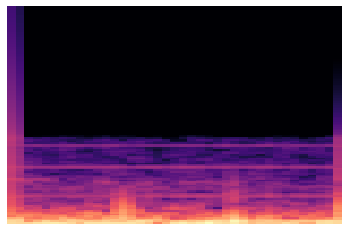

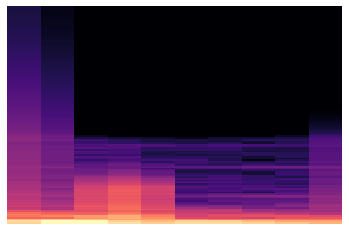

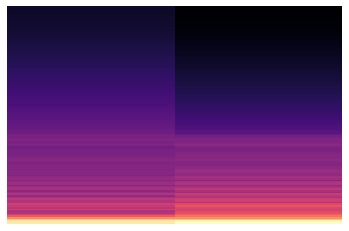

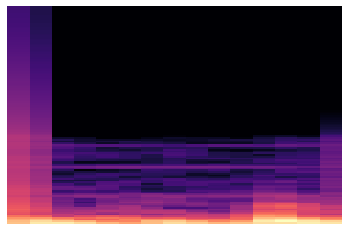

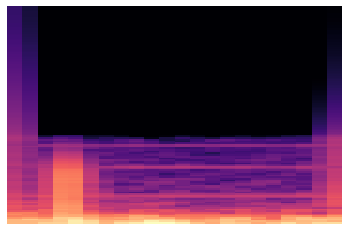

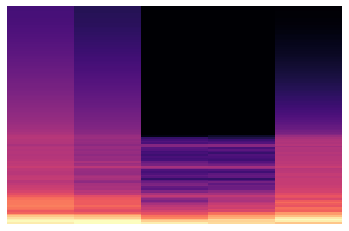

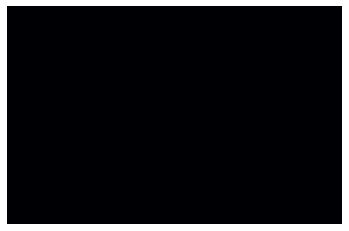

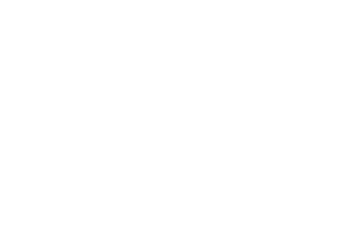

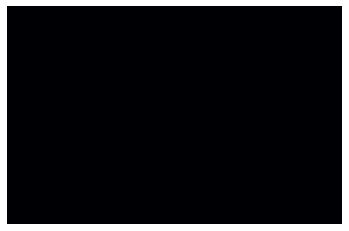

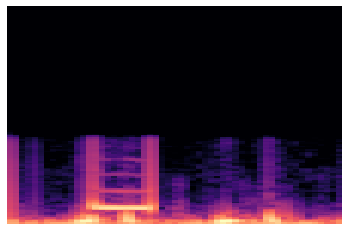

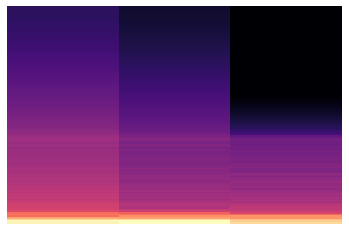

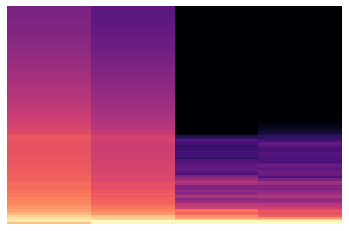

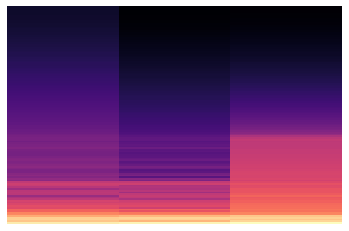

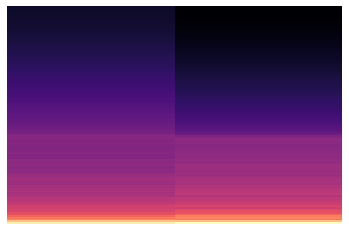

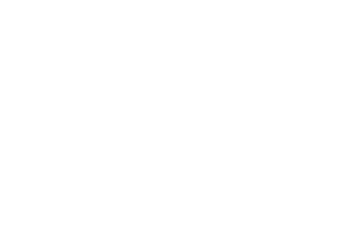

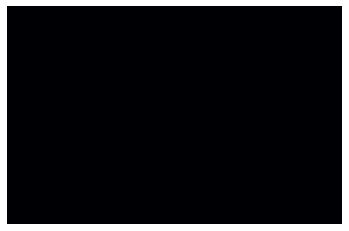

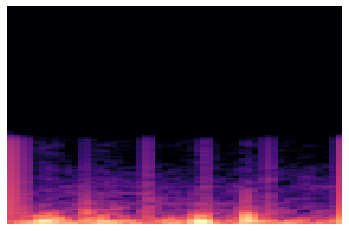

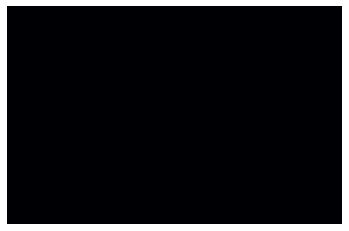

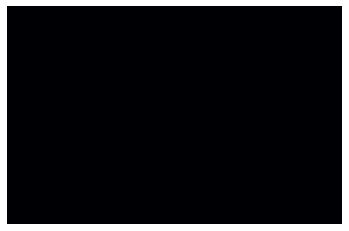

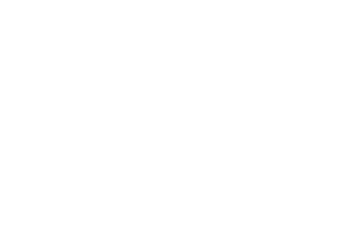

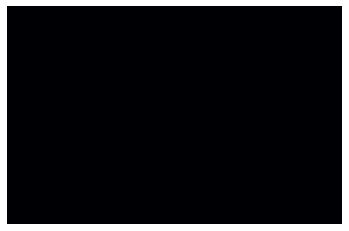

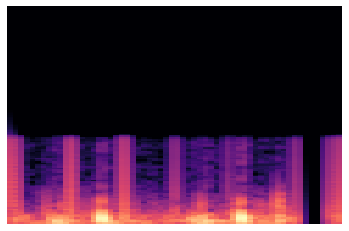

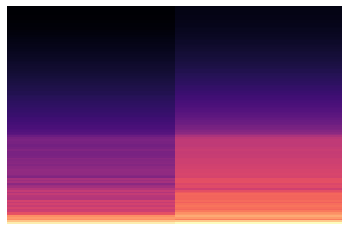

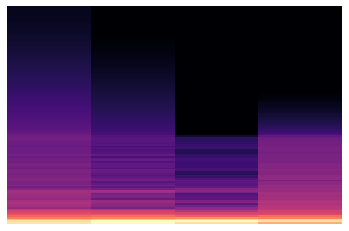

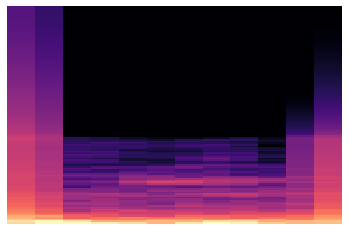

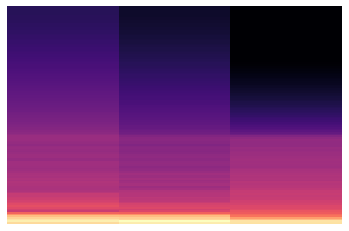

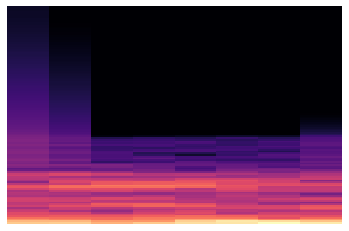

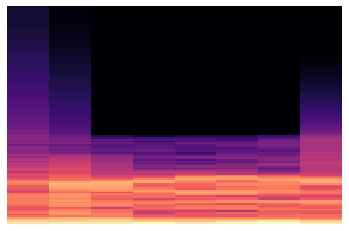

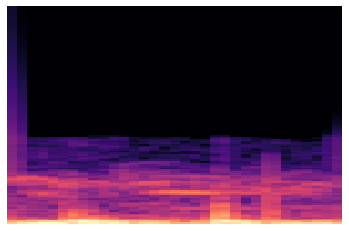

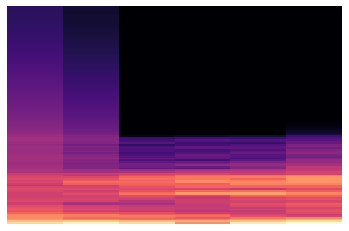

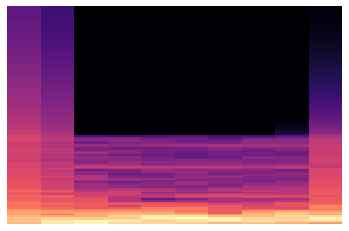

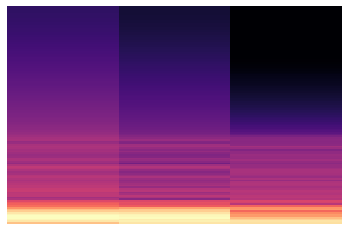

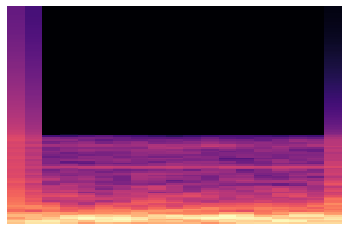

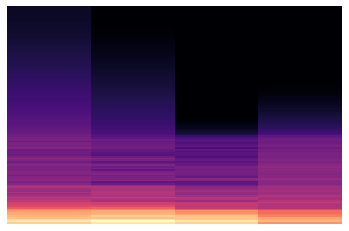

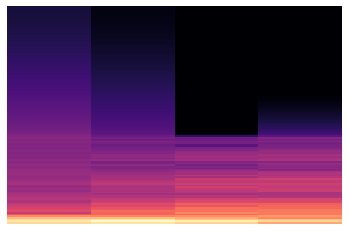

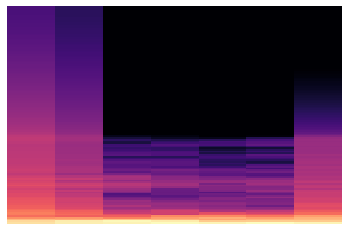

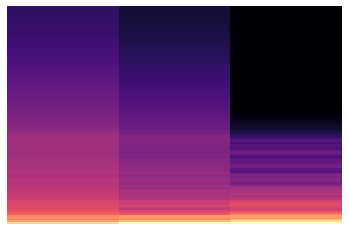

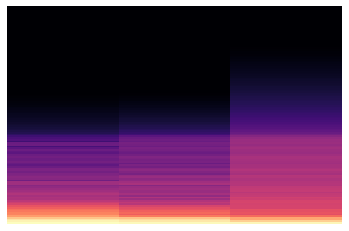

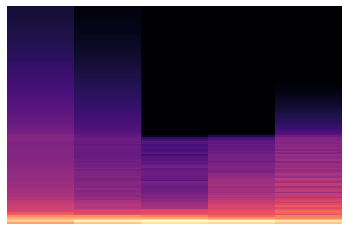

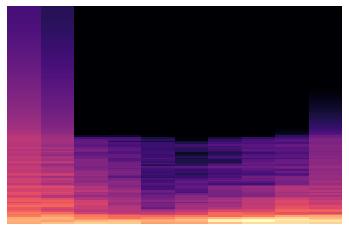

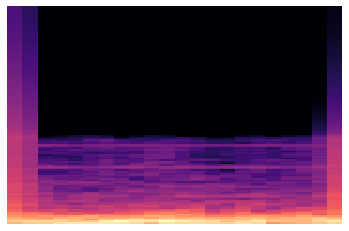

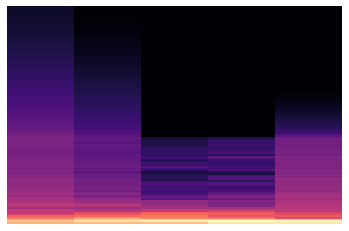

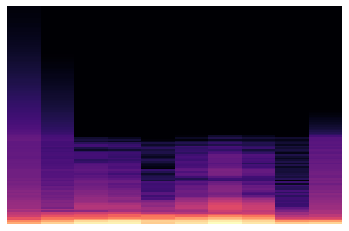

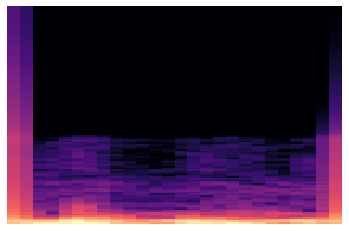

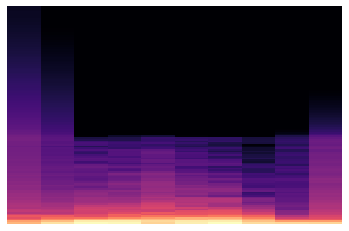

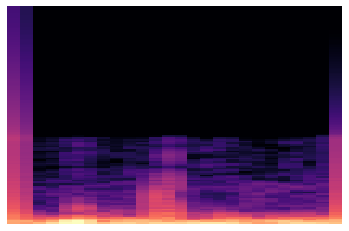

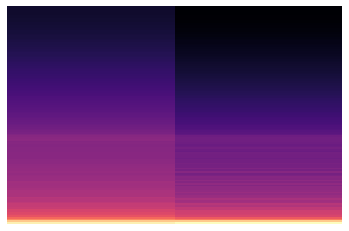

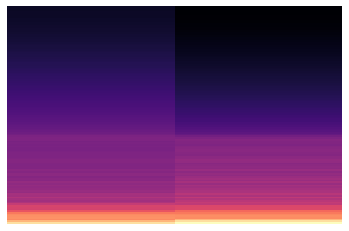

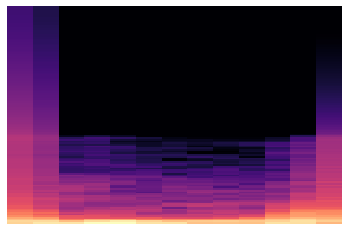

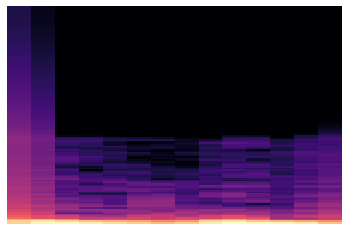

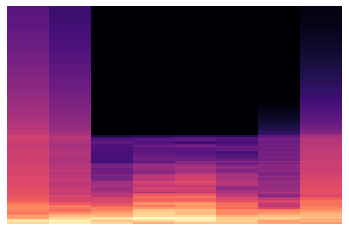

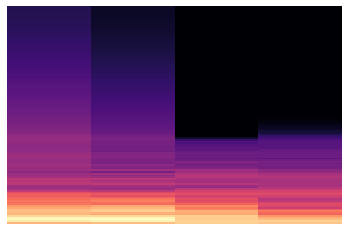

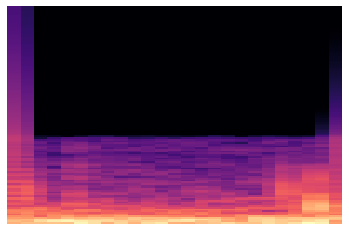

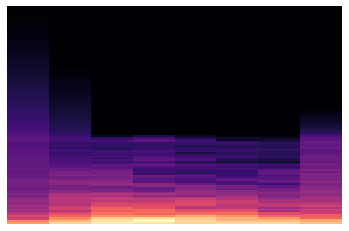

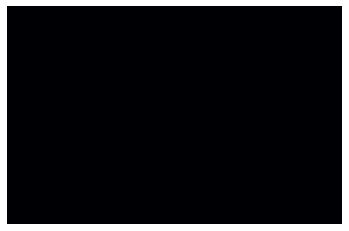

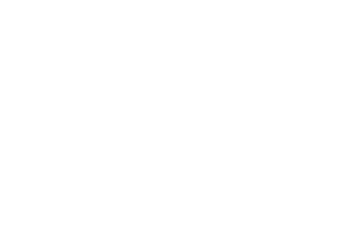

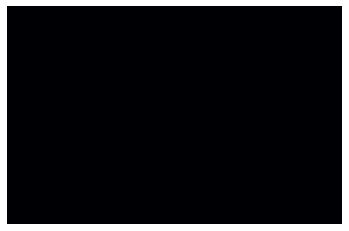

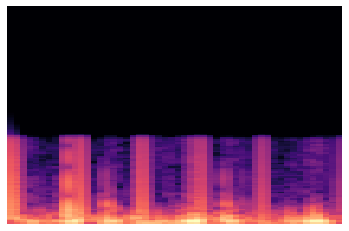

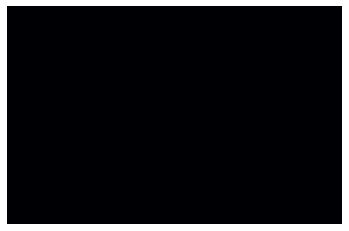

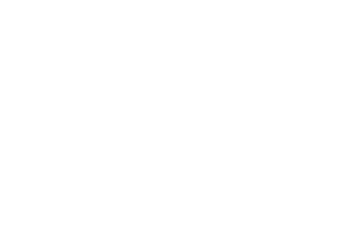

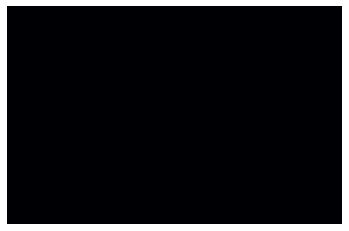

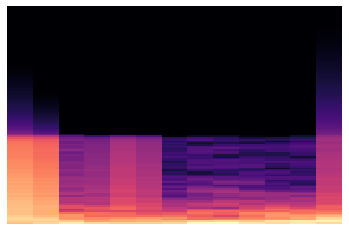

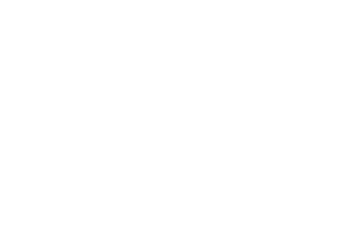

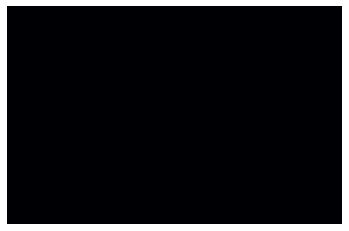

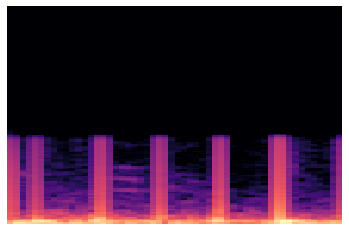

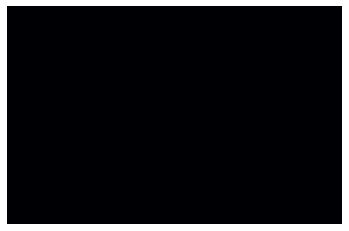

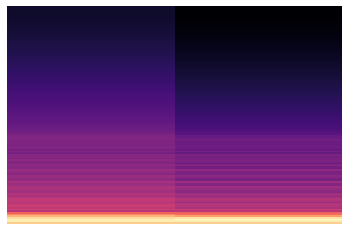

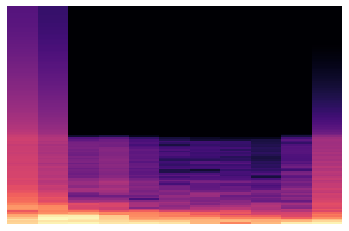

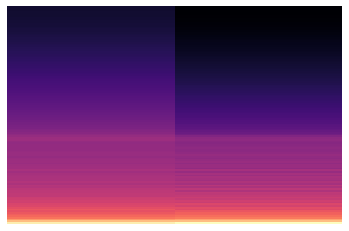

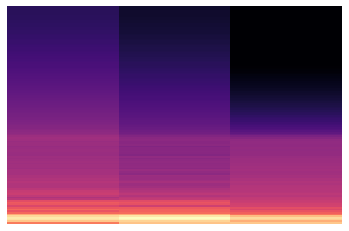

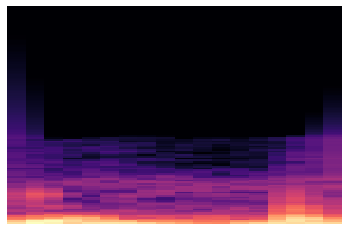

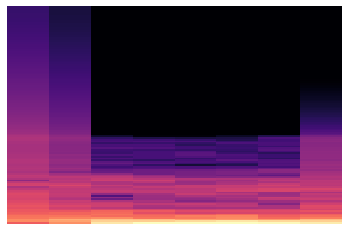

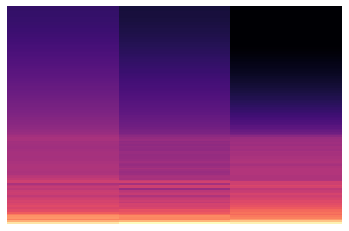

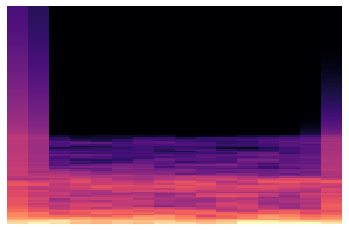

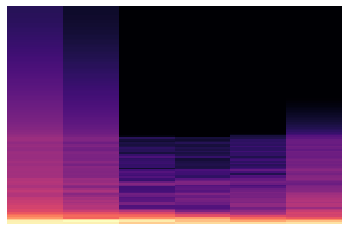

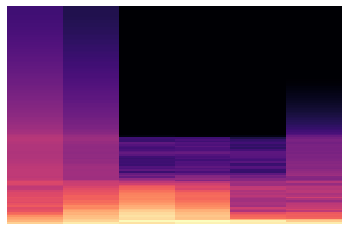

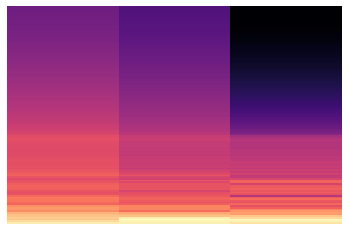

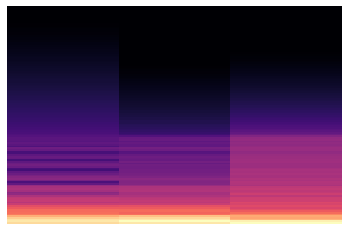

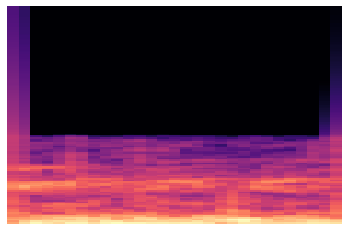

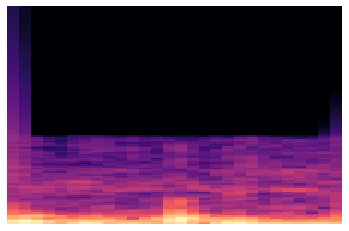

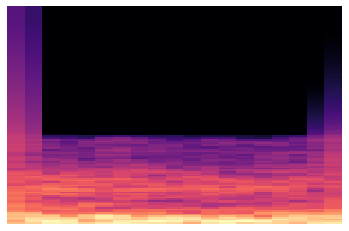

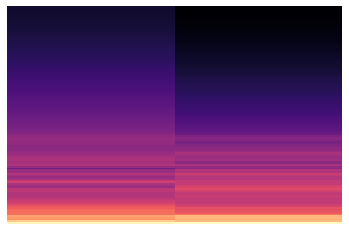

In [44]:
abnormalList=['d0001',
'd0005',
'd0006',
'd0007',
'd0013',
'd0015',
'd0016',
'd0020',
'd0023',
'd0024',
'd0025',
'd0027',
'd0030',
'd0031',
'd0036',
'd0037',
'd0041',
'd0043',
'd0044',
'd0045',
'd0047',
'd0048',
'd0049',
'd0050',
'd0053',
'd0054',
'd0055',]


def segment_Files(wavpath,patientid):
    PCG_signal=eng.audioread(wavpath)
    cp=eng.findchangepts(PCG_signal[1:6000], 'Statistic','std', 'MinDistance',2E+1, 'MaxNumChanges',13)
    S1=PCG_signal[round(cp[0][0]):round(cp[1][0])]
    Systole=PCG_signal[round(cp[1][0]):round(cp[2][0])]
    S2=PCG_signal[round(cp[2][0]):round(cp[3][0])]
    Diastole=PCG_signal[round(cp[3][0]):round(cp[4][0])]
    get_all_spectrograms(S1,S2,Systole,Diastole,patientid)
    
def get_all_spectrograms(S1,S2,Systole,Diastole,patientid):
    new_S1=[]
    for i in range(len(S1)):
        new_S1.append(S1[i][0])
    new_S1=np.array(new_S1)
    write('newS1.wav',2000,new_S1)
    getSpectrogram('newS1.wav','S1')
    plt.savefig(f'C:/Users/Roshni/OneDrive/Desktop/Sem7/Project 1/NovemberWork/AbnormalS1/{patientid}.png')
    print(f'SAVED S1 {patientid}')
    
    new_Systole=[]
    for i in range(len(Systole)):
        new_Systole.append(Systole[i][0]) 
    new_Systole=np.array(new_Systole)
    write('newSystole.wav',2000,new_Systole)
    getSpectrogram('newSystole.wav','Systole')
    plt.savefig(f'C:/Users/Roshni/OneDrive/Desktop/Sem7/Project 1/NovemberWork/AbnormalSystole/{patientid}.png')
    print(f'SAVED Systole {patientid}')
    
    newS2=[]
    for i in range(len(S2)):
        newS2.append(S2[i][0])
    newS2=np.array(newS2)
    write('newS2.wav',2000,newS2)
    getSpectrogram('newS2.wav','S2')
    plt.savefig(f'C:/Users/Roshni/OneDrive/Desktop/Sem7/Project 1/NovemberWork/AbnormalS2/{patientid}.png')
    print(f'SAVED S2 {patientid}')
    
    new_Diastole=[]
    for i in range(len(Diastole)):
        new_Diastole.append(Diastole[i][0])
    new_Diastole=np.array(new_Diastole)
    write('newDiastole.wav',2000,new_Diastole)
    getSpectrogram('newDiastole.wav','Diastole')
    plt.savefig(f'C:/Users/Roshni/OneDrive/Desktop/Sem7/Project 1/NovemberWork/AbnormalDiastole/{patientid}.png')
    print(f'SAVED Diastole {patientid}')
    
    

pathlist = Path('C:/MATLAB/physionet.org/files/challenge-2016/1.0.0/training-d/').rglob('*.wav')
for path in pathlist:
    file_name = str(path)
    patientid = file_name.split("\\")[7].split(".")[0]
    if patientid in abnormalList:
         segment_Files(file_name,patientid)
